In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from scipy.stats import norm
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

In [4]:
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

In [5]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [6]:
data.shape

(150, 5)

In [23]:
def train_validate_test_split(data, labels, testRatio = 0.3, valRatio = 0.3):
    trainRatio = 1 - (testRatio + valRatio)
    train, test, validate = np.split(data.sample(frac=1, random_state=42),
                                     [int(trainRatio*len(data)),
                                      int((trainRatio+testRatio)*len(data))])
    return train, validate, test

In [24]:
train, val, test = train_validate_test_split(data, iris.target_names, 0.2, 0)

In [25]:
val.shape

(0, 5)

In [26]:
test.shape

(30, 5)

In [27]:
train.shape

(120, 5)

In [12]:
X_train = train.iloc[:,:-1]
y_train = train.iloc[:,4]
X_test = test.iloc[:,:-1]
y_test = test.iloc[:,4]

In [13]:
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [14]:
prediction = model.predict(X_test)

In [15]:
prediction

array([0., 2., 2., 0., 1., 1., 2., 1., 2., 0., 2., 1., 2., 1., 1., 1., 0.,
       1., 1., 0., 1., 2., 2., 0., 1., 2., 2., 0., 2., 0., 1., 2., 2., 1.,
       2., 1., 1., 2., 2., 0., 1., 1., 0., 1., 2.])

In [16]:
def calculate_accuracy(prediction, y_test):
    (np.sum(prediction == y_test)/len(y_test))

In [17]:
accuracy_score(y_test, prediction)

0.9777777777777777

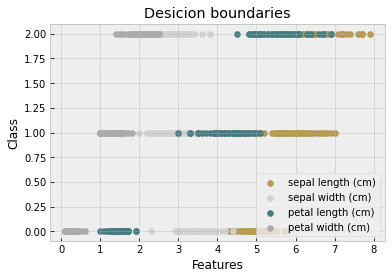

In [18]:
plt.style.use("bmh")
fig, ax = plt.subplots()
ax.scatter(data['sepal length (cm)'],  data.target, label = 'sepal length (cm)', color='#b69851')
ax.scatter(data['sepal width (cm)'],  data.target, label = 'sepal width (cm)', color='#d2d2d2')
ax.scatter(data['petal length (cm)'],  data.target, label = 'petal length (cm)', color='#447c81')
ax.scatter(data['petal width (cm)'],  data.target, label = 'petal width (cm)', color='#aaaaaa')
ax.set_xlabel('Features')
ax.set_ylabel('Class')
ax.set_title('Desicion boundaries')
ax.legend()
plt.show()